# LAB 06.02 - NMF face search

In [1]:
#!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/20201.xai4eng/master/content/init.py
import init; init.init(force_download=False); init.get_weblink()

endpoint https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc


In [65]:
from local.lib.rlxmoocapi import submit, session
student = session.Session(init.endpoint).login( course_id=init.course_id, 
                                                session_id="UDEA", 
                                                lab_id="L06.02" )
init.get_weblink()

username: kevin.martinez@udea.edu.co
password: ········
endpoint https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc


## Dataset

we will use the faces dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [4]:
import numpy as np
faces = np.load("local/data/faces.npy")
faces.shape

(535, 361)

In [5]:
def plot_faces(faces):
    assert len(faces)<=30, "can only plot at most 30 faces"
    plt.figure(figsize=(15,2))
    for i in range(len(faces)):
        plt.subplot(2,15,i+1)
        plt.imshow(faces[i].reshape(19,19), cmap=plt.cm.Greys_r)
        plt.xticks([]); plt.yticks([])

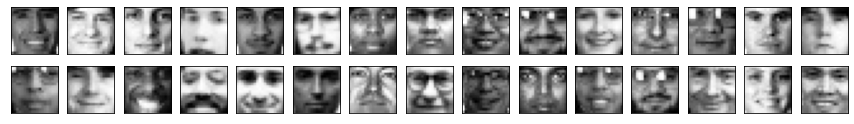

In [6]:
plot_faces(np.random.permutation(faces)[:30])

## Task 1: Distance function for a vector

complete the following function so that given a vector $v \in \mathbb{R}^n$ and a `numpy` array $X \in \mathbb{R}^{m\times n}$ (whose rows are vectors of the same size as $v$) returns a new array $\in \mathbb{R}^m$ with the Euclidean distance between $v$ and each vector in $X$.

Recall that the Euclidean distance between vectors $z=[z_0,...z_{n-1}]$ and $w=[w_0,...,w_{n-1}]$ is given by

$$\text{distance}(z,w) = \sqrt{\sum_{i=0}^{n-1} (z_i-w_i)^2}$$


**hint**: use [`np.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) to compute a distance between two vectors

**challenge**: solve it using one line of code.

**note**: your function must return a 1D numpy array of dimension $m$, not a list.

for instance, for the following values of $v$ and $X$

    X = array([[9, 5, 1, 3, 8, 3, 3, 3, 9, 2],
               [9, 7, 0, 7, 9, 1, 4, 7, 3, 6],
               [8, 0, 0, 5, 0, 5, 5, 1, 1, 5],
               [8, 2, 9, 5, 6, 0, 8, 7, 2, 8],
               [0, 6, 3, 0, 6, 6, 1, 2, 8, 0]])
                  
    v = np.array([9, 7, 0, 7, 9, 1, 4, 7, 3, 6])


you should get the following result

    array([ 9.74679434,  0.        , 13.89244399, 11.91637529, 16.40121947])


In [37]:
X = np.array([ [9, 5, 1, 3, 8, 3, 3, 3, 9, 2],
               [9, 7, 0, 7, 9, 1, 4, 7, 3, 6],
               [8, 0, 0, 5, 0, 5, 5, 1, 1, 5],
               [8, 2, 9, 5, 6, 0, 8, 7, 2, 8],
               [0, 6, 3, 0, 6, 6, 1, 2, 8, 0]])
v = np.array([9, 7, 0, 7, 9, 1, 4, 7, 3, 6])

In [27]:
distances(v, X)

array([ 9.74679434,  0.        , 13.89244399, 11.91637529, 16.40121947])

In [41]:
def distances(v, X):
    return np.linalg.norm((X - v), axis = 1)

check manually your code

In [22]:
X = np.random.randint(10, size=(5,10))
v = X[1]
print(type(X), type(v))
print("X =\n", X)
print("\nv =", v)
dist = distances(v, X)
dist

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
X =
 [[6 1 2 5 5 2 1 3 7 5]
 [7 4 6 9 9 6 6 0 1 6]
 [4 5 5 2 7 3 5 1 9 2]
 [1 8 1 8 2 2 9 6 2 7]
 [3 0 4 3 5 4 1 5 6 5]]

v = [7 4 6 9 9 6 6 0 1 6]


array([12.04159458,  0.        , 12.4498996 , 13.78404875, 12.9614814 ])

In [24]:
print(type(dist), dist.shape)

<class 'numpy.ndarray'> (5,)


**submit your code**

In [25]:
student.submit_task(globals(), task_id="task_01");

## Task 2: Positions of closest vectors

complete the following function so that given $v$ and $X$ as previously, returns the positions of the $n$ closest vectors to $v$ in $X$.

**hint**: use the [`np.argsort`](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) function

**challenge**: solve it using one line of code

for the example $v$ and $X$ above you should get the following outputs

    >> closest(v, X, 2)
    array([1, 0])

    >> closest(v, X, 3)
    array([1, 0, 3])


In [38]:
distances = distances(v, X)
sorted_ind = np.argsort(distances)
sorted_ind[:3]

array([1, 0, 3], dtype=int64)

In [54]:
def closest(v, X, n):
    assert n<len(X), "n must be at most the number of vectors in X"
    distances = lambda v, M : np.linalg.norm((X - v), axis = 1)
    return np.argsort(distances(v, X))[:n]

check manually your code

In [55]:
X = np.random.randint(10, size=(5,10))
v = X[1]

print ("X=\n", X)
print ("\nv=", v,"\n\n")
print (closest(v, X, 2))
print (closest(v, X, 3))

X=
 [[9 6 0 8 1 1 8 6 7 1]
 [1 8 3 1 5 6 4 0 5 8]
 [0 0 5 2 0 9 4 9 6 8]
 [9 5 6 9 7 1 2 8 5 3]
 [5 0 7 0 6 9 4 5 1 1]]

v= [1 8 3 1 5 6 4 0 5 8] 


[1 2]
[1 2 4]


### observe now how we can use your functions to search for faces similar to any other face

TARGET FACE


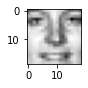

In [51]:
plt.figure(figsize=(1,1))
fi = 23 # np.random.randint(len(faces)) # 314 
face = faces[fi]
plt.imshow(faces[fi].reshape(19,19), cmap=plt.cm.Greys_r)
print ("TARGET FACE")

SIMILAR FACES


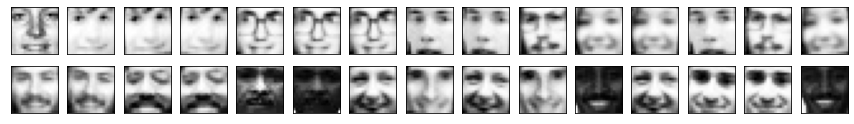

In [52]:
plot_faces(faces[closest(face, faces, 30)])
print ("SIMILAR FACES")

But they do not look so similar, this is because we are doing comparison **pixel by pixel**. We will fix this in the next task

**submit your code**

In [56]:
student.submit_task(globals(), task_id="task_02");

## Task 3: Use NMF to find similar faces

Make the comparison in the faces space resulting from transforming them using NMF. For this you have to:

- create an instance of NMF with `n_components=30, init="random", random_state=0`
- fit the instance with $X$
- transform $X$
- transform $v$
- return the positions of closest $n$ vectors in the transformed $X$ to the transformed $v$

For the target face above, you should get the following

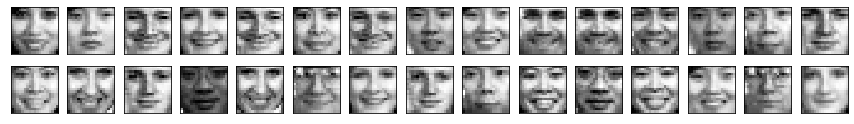

In [57]:
from IPython.display import Image
Image(filename='local/imgs/similar-images2.png')

In [59]:
print(face.shape)
print(faces.shape)

(361,)
(535, 361)


In [61]:
face.reshape(1,-1).shape

(1, 361)

In [62]:
def find_similar(v,X,n):
    from sklearn.decomposition import NMF
    
    def closest(v, X, n):
        assert n<len(X), "n must be at most the number of vectors in X"
        distances = lambda v, M : np.linalg.norm((X - v), axis = 1)
        return np.argsort(distances(v, X))[:n]
    
    nmf = NMF(n_components=30, init="random", random_state=0)
    nmf.fit(X)
    Xt = nmf.transform(X)
    vt = nmf.transform(v.reshape(1,-1))
    
    return closest(vt, Xt, n)

check manually your answer

C:\Users\Kevin\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


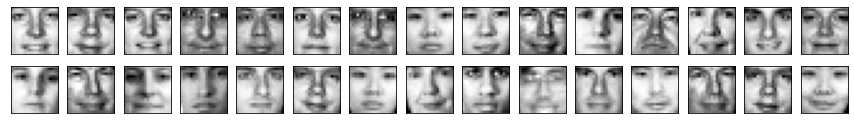

In [63]:
plot_faces(faces[find_similar(face, faces, 30)])

**submit your code**

In [66]:
student.submit_task(globals(), task_id="task_03");